# Computational Social Science Project #3 

**Name: Brenda Sciepura

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [788]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [789]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("/Users/brenda/github/Computational-Social-Science-Projects/Project 3/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("/Users/brenda/github/Computational-Social-Science-Projects/Project 3/Chicago Inspections 2014_updated.csv",  
                                      low_memory=False)

In [790]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [791]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

### Visualization

Let's visualize what inspections look like over time.

In [792]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

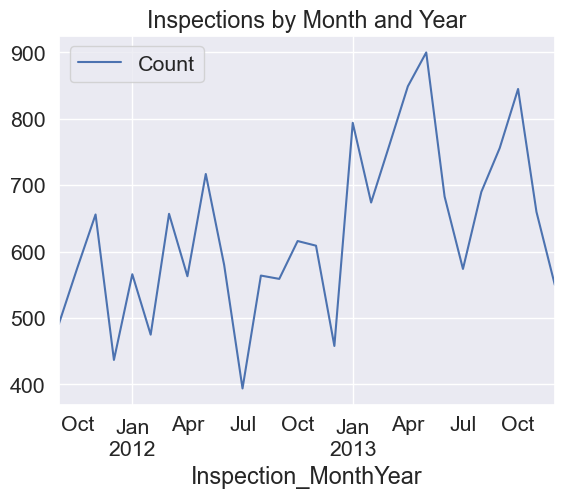

In [793]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

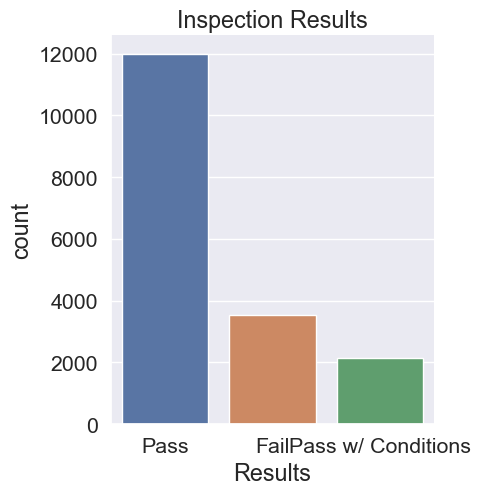

In [794]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

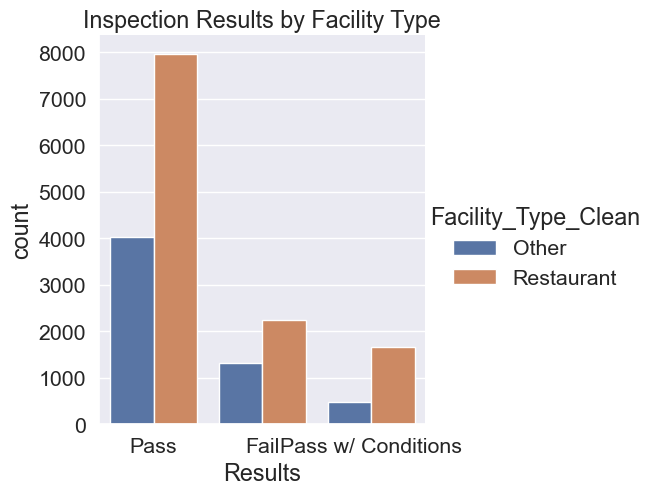

In [795]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [796]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag',
                                                 'LICENSE_DESCRIPTION',
                                                 'WARD_PRECINCT',
                                                 'Facility_Type'],                                      
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [797]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [798]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])

# get dummies
X = pd.get_dummies(X)

In [799]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,1,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,1,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,1,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,1,0,1,0,0,0,1


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

## Split the data

In [800]:
# Set seed
np.random.seed(10)

# training and test split 
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  train_size = .80, 
                                                  test_size=0.20,
                                                  stratify=y)

# Print the shapes of the resulting sets
print("Training set shapes - Features: {}, Labels: {}".format(X_train.shape, y_train.shape))
print("Validation set shapes - Features: {}, Labels: {}".format(X_val.shape, y_val.shape))

Training set shapes - Features: (12262, 41), Labels: (12262, 1)
Validation set shapes - Features: (3066, 41), Labels: (3066, 1)


### Model 1

## Logistic regression (LG) 

Pros:

** Interpretability: LR provides interpretable results. The model coefficients can be interpreted in terms of the impact on the log-odds of the response variable.

** Efficiency: LR tends to be computationally efficient, especially when dealing with large datasets or a high number of features.

** Well-suited for Binary Classification: LG is well-suited for binary classification problems where the outcome variable is dichotomous, as in this case (i.e. pass/fail).

** Linearity Assuption: LR assumes a linear relationship between the independent variables and the log-odds of the response variable. When this assumption holds, it can perform well.

Cons:

** Linearity Assumption: If the relationship between the IVs and the log-odds is not linear, LR may not perform well.

** Outliers: LR can be sensitive to outliers in the dataset, especially when the number of observations is limited. Outliers can heavily influence the estimated coefficients.

** Noisy Data: If the dataset is noisy or contains irrelevant features, LR may produce less accurate results. 

In [801]:
# Logistic Regression - using liblinear solver
# ----------

# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_val)

In [802]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

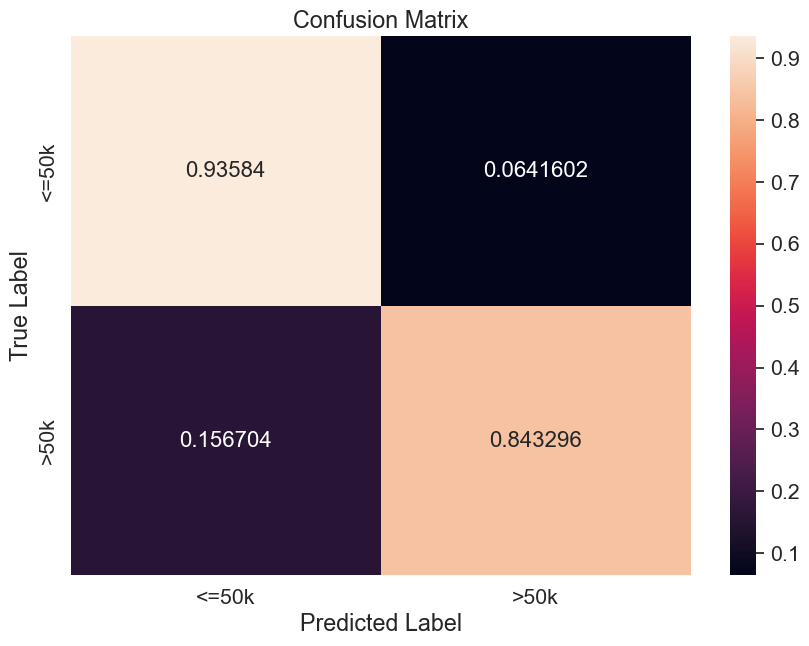

In [803]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_val, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [804]:
# set parameters (Note: I could not test more parameters because I couldn't run this code, it took hours, but I always got the same result 0.92)
param_grid = {'penalty': ['l1', 'l2']}

In [805]:
# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)

In [806]:
logit_grid.fit(X_train, 
               y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [807]:
# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_val)

In [808]:
# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_val))

{'penalty': 'l1'}
Validation Accuracy 0.9171559034572733


### Model 2

## Random Forests (RF)

## Pros

** High Predictive Accuracy: RF combine multiple decision trees to make predictions. By aggregating the predictions of multiple trees, they avoid overfitting and improve the model's ability to generalize. This is key with inspection data, as we want to accurately predict outcomes based on various facility-related features.

** Robustness to Outliers: In the case that inspection data has outliers, since RF consider multiple trees, they are less affected by extreme values.

** Feature Relevance: In the context of inspections, it's valuable to understand which features of facilities help most in predicting inspection outcomes in terms of policy implications.

** Interpretability: Even if RF are less interpretable than, say, linear coefficients, we can still make sense of feature scores and tree structures to understand what's driving inspection outcomes.

## Cons 

** Model Complexity: RF get more complex as the number of trees increases, which can negatively affect interpretability. In a topic as sensitive as inspection outcomes, it might be important to be able to explain why facilities pass the inspection or not in a way that they can understand. 

** Overfitting: RF are less prone to overfitting than individual decision trees, but they can still overfit if not properly tuned. We need to make sure we're properly tuning hyperparameters. In the code below, for instance, I first run the model withthe default max_depth which might incurred in overfitting, and then I restrict that to see how the model changes based on that parameter tuning. 

** Computational Cost: RF can be computationally expensive, especially with a large number of trees and a significant sample size. For instance, in the code below where I run the model using 100 trees, it takes a really long time to run the model. 

** Flexibility but will not capture linear relationships in the data.

** Sensitive to Noisy Data, including outliers and mislabeled instances. 

In [809]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=10,               # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [810]:
# specify cross-validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

In [811]:
scores.mean()

0.9127092810799711

In [812]:
## Hyperparameter tuning of random forest
## Note: Initially I ran this but it took forever and the result was not different, so I'm commenting it out 

#param_grid = {
#   'max_depth': [5, 10],
#    'min_samples_split': [2, 5],
#}
#
#grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X, y)
#
#print("Best Parameters:", grid_search.best_params_)
#
#best_rf_model = grid_search.best_estimator_

###  Model 2

## AdaBoost (AB)

## Pros

** Improved Accuracy: AB often leads to improved accuracy beacause it builds on weak learners to improve performance. 

** Overfitting: AB tends to reduce overfitting. The combination of multiple weak learners helps create a more generalized model.

** Handles Class Imbalance: By assigning higher weights to misclassified instances, it focuses on improving the classification of minority classes.

## Cons:

** Sensitive to Noisy Data: Outliers may receive high weights during training, affecting the performance of the model.

** Interpretability: The final AB model is a combination of multiple weak learners, making it less interpretable compared to a single decision tree. Understanding the individual contributions of each weak learner can be challenging.

** Large volume of data: AB may not work well with small datasets because it needs enough data to learn from weak learners.

** Hyperparameter Tuning: Tuning the hyperparameters, especially the number of weak learners is crucial to improve performance. It may lead to overfitting if not done carefully and it's also very computationally intensive.


In [813]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

In [814]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [815]:
# calculate mean score across models 
# ----------
scores.mean()

0.914405387085

### Model 3

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [816]:
# Define the machine learning models
models = {
    'Logistic Regression': LogisticRegression(), 
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier()
}

# Metrics to calculate
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Iterate through models and calculate cross-validated metrics
for model_name, model in models.items():
    print(f'Model: {model_name}')
    
    for metric in metrics:
        scores = cross_val_score(model, X, y, cv=5, scoring=metric)  # 5-fold cross-validation
        avg_score = scores.mean()
        
        print(f'{metric.capitalize()}: {avg_score:.4f}')    

Model: Logistic Regression
Accuracy: 0.9166
Precision: 0.7639
Recall: 0.8519
F1: 0.8047
Model: Random Forest
Accuracy: 0.9243
Precision: 0.7702
Recall: 0.8759
F1: 0.8226
Model: Ada Boost
Accuracy: 0.9139
Precision: 0.7781
Recall: 0.8050
F1: 0.7900


This is how we view what each metrics means and how we'll use them in this particular context: 

Accuracy is the ratio of correctly predicted instances to total instances. In this case, we have an unbalanced dataset, with more observations for pass instances than fail instances. Therefore, even if accuracy is a common metric, we don't think it's the best indicator for this context. 

Precision measures the ratio of correctly predicted positive observations to total predicted positives. Precision is key when the cost of false positives (Type I errors) is high. A false positive in this case is when a facility does everything well but does not pass the inspection, which is a high cost. We don't want this to happen. 

Recall measures the ability of the model to capture all positive instances. It is key when the cost of false negatives (Type II errors) is high. In this case, a false negative is when a facility has infractions that go unnoticed and passes the inspection. We don't want this, but a false positive is even worse in this context. However, we would like to avoid both situations as much as possible. And this is when the F1 score comes into the picture. 

The F1 score provides a balance between precision and recall, and becomes useful when there is an uneven class distribution, in this case, between pass and fail instances, or when we would like to avoid as much as possible both false positives and false negatives.

When conducting this type of auditing we'd want to prioritize F1 scores which provides a balance between precision and recall, as both false positives and false negatives seems dangerous, and very unfair to those who would be damaged due to that situation. If we close businesses which are doing things well, we damage the business people we should be supporting. If we allow a faulty business to be open, we put the community at risk. 

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

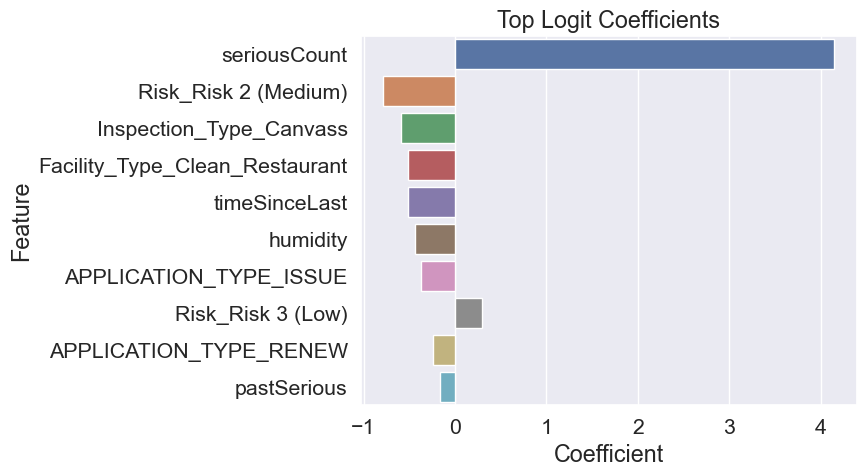

In [817]:
## Feature importance plot logit regression

# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

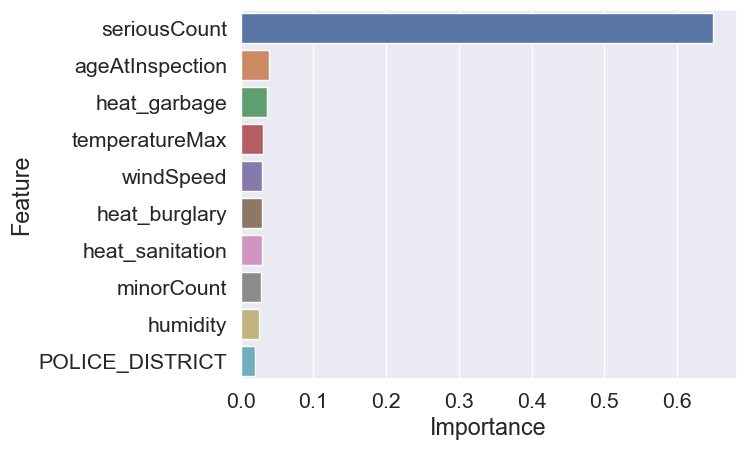

In [818]:
## Feature importance plot random forest 

rf_classifier.fit(X, y.ravel())

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

## Seems that mostly one predictors is making important contributions to splitting the data (serious count) and then other three predictors to a lesser extent (age at inspection, heat garbage and minor count).

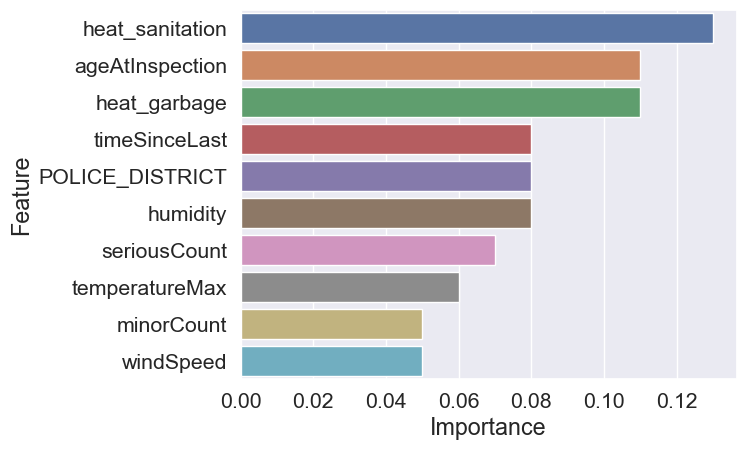

In [819]:
## Feature importance plot ada classifier 

ada_classifier.fit(X, y.ravel())

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ada_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

# Intepretation of feature importance in all models 
All models share the same main predictor which is serious count. However, the rest of the features between the logit model, random forest and ada boost model differ greatly. 

# Additional features to incorporate that are not present in the data
One interesting feature to look at would be who is doing the inspection, and whether characteristics of the person doing the inspection are also predictors of the ultimate decision to pass or fail a facility (i.e. gender, age or tenure of inspector). 

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [820]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------

probability_estimates = ada_classifier.predict_proba(X)
#print("Probability Estimates:\n", probability_estimates)

In [821]:
X_audits = X.assign(fail_proba=probability_estimates[:, 0])

In [822]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------

X_ordered = X_audits.sort_values(by='fail_proba', ascending=False)

<Axes: xlabel='fail_proba', ylabel='Count'>

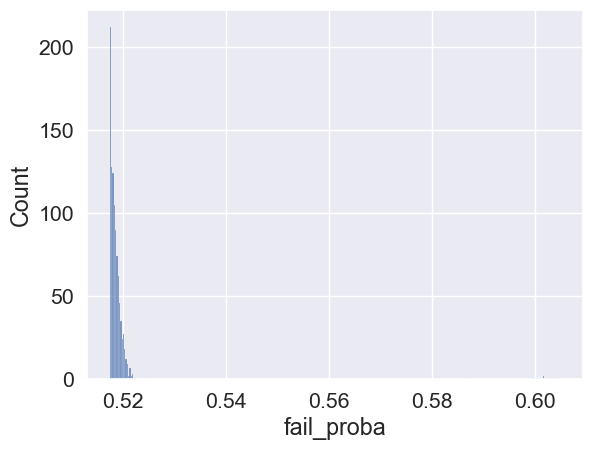

In [823]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

sns.histplot(X_ordered.head(1000)['fail_proba'])

In [824]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

random_seed = 42
df_sampled = X.sample(n=1000, random_state=random_seed)

## I'm just showing some of the most important features for this subset of random obs just so that the printing of information is not so long
subset_df = df_sampled.loc[:, ['criticalCount','seriousCount', 'minorCount', 'POLICE_DISTRICT', 'ageAtInspection', 'pastCritical', 'temperatureMax', 'heat_garbage']]

# Display the sampled DataFrame
print(subset_df.head())

                                                  criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                          
1227289       RESTAURANTE Y TAQUERIA LOS PAYASOS              0             0   
1324478       SUBWAY                                          0             0   
1151343       VIDA SALUDABLE                                  0             0   
1084263       FIG CATERING, LLC                               0             0   
1227546       SUBWAY                                          0             0   

                                                  minorCount  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                          
1227289       RESTAURANTE Y TAQUERIA LOS PAYASOS           5              8.0   
1324478       SUBWAY                                       2              1.0   
1151343       VIDA SALUDABLE                               3              8.0   
1084263       FIG CATERING,

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [825]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                         'License',
                                         'Address',
                                         'City',
                                         'State',
                                         'Zip',
                                         'Latitude',
                                         'Longitude',
                                         'Location',
                                         'ID',
                                         'LICENSE_ID',
                                         'LICENSE_TERM_START_DATE',
                                         'LICENSE_TERM_EXPIRATION_DATE',
                                         'LICENSE_STATUS',
                                         'ACCOUNT_NUMBER',
                                         'LEGAL_NAME',
                                         'DOING_BUSINESS_AS_NAME',
                                         'ADDRESS',
                                         'CITY',
                                         'STATE',
                                         'ZIP_CODE',
                                         'WARD',
                                         'PRECINCT',
                                         'LICENSE_CODE',
                                         'BUSINESS_ACTIVITY_ID',
                                         'BUSINESS_ACTIVITY',
                                         'LICENSE_NUMBER',
                                         'LATITUDE',
                                         'LONGITUDE',
                                         'LICENSE_DESCRIPTION',
                                         'WARD_PRECINCT',
                                         'Facility_Type',
                                         'LICENSE_DESCRIPTION',
                                         'WARD_PRECINCT'],                                      
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [826]:
# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate'],
                                                                                  axis = 1)

In [827]:
# data processing
# -----------

# process target 
y_test2014 = chicago_inspections_2014['Results']

In [828]:
# binarize the outcome variable 
# -----------
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y == 1, 0 ,1)

In [829]:
# create feature dataset
X_test2014 = chicago_inspections_2014.drop(columns = ['Results'])
X_test2014 = pd.get_dummies(X_test2014)

In [830]:
# predict and compare 
# -----------
y_test_2014 = ada_classifier.predict(X_test2014)

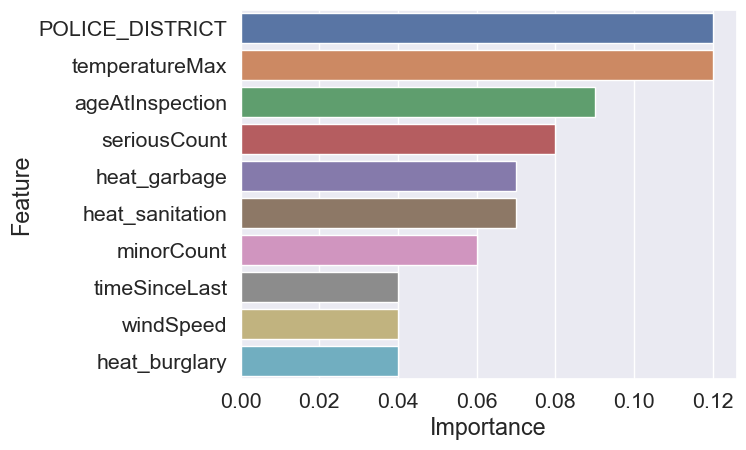

In [831]:
## Feature importance plot ada classifier 

ada_classifier.fit(X_test2014, y_test_2014.ravel())

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ada_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

## Interpretation: Relevance of features differs in the test set. Whereas before the most important feature was serious count, here serious count appear in the 5th place. Police district, which is the most important feature here, appears third in the previous AdaBoost model. Other features, such as age at inspection, heat garbage or max temperature, appear in all models in different levels of importance.
## This might mean that the models might have different sensitivities to different features, it might also mean that their parameters are not properly tuned. 

In [ ]:
# evaluate
# -----------

# Define the machine learning models
models = {
    'Ada Boost': AdaBoostClassifier()
}

# Metrics to calculate
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Iterate through models and calculate cross-validated metrics
for model_name, model in models.items():
    print(f'Model: {model_name}')
    
    for metric in metrics:
        scores = cross_val_score(model, X, y, cv=5, scoring=metric)  # 5-fold cross-validation
        avg_score = scores.mean()
        
        print(f'{metric.capitalize()}: {avg_score:.4f}') 
        
## In terms of these metrics, the model performs in the test set exactly the same as before. We said we would prioritize F1 score in this context. An F1 score of 0.79 indicates that precision and recall are reasonably balanced.
## The model is performing well in terms of both making accurate positive predictions (precision) and capturing most of the positive instances (recall).

Model: Ada Boost


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


In many real-world settings, classes may be imbalanced, which means that one class significantly outnumbers the other/s. In such cases, a model that prioritizes accuracy, which is a model that predicts the majority class, might fail to capture the nuances and patterns in the minority classes, which is key for making useful policy decisions. 

Accuracy measures treat false positives and false negatives equally. In real-world policy contexts, the costs and consequences of each of these types of errors can vary significantly, and depending on the context we would like to minimize one or the other. For inspection data it's hard to say, but initially we could argue that we would prioritize not closing a business that is doing things well (although leaving open a business that is doing things wrong seems dangerous as well). 

Aditionally, accuracy alone doesn't provide sufficient insight into why a model made a specific prediction. Interpretability metrics and techniques, like feature importance or model explanations, are important for understanding and justifying policy decisions.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

Policymakers can periodically update the auditing algorithm in anticipation of changing behaviors and tactics by establishments. They could retrain the model each time with the most recent data, which would make the algorithm more capable of effectively detecting these tactics of the "client" using them.

Policymakers can employ a degree of randomness in the audit selection process to make it harder for establishments to predict when they might be audited (such as we did in this dataset by choosing 1,000 random establishments). If you don't know when it's your turn to be audited, it makes it harder to strategize how to game the system. 

Rather than relying on a single source of data, if more data is available, policymakers could combine multiple sources of data, which would make it more difficult for facilities to manipulate certain features to their advantages, as they would not know which features these are given that the data responds to higher heterogeneity. 

Other measures less related with data and more related with policy could imply strengthening transparency rules in data sharing or increasing penalties for engaging in this type of behavior (to game the system). 